In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neattext as nt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

import qgrid

In [15]:
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral")

In [16]:
def sentiment_scores_modified(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    negative.append(sentiment_dict['neg']*100)
    neutral.append(sentiment_dict['neu']*100)
    positive.append(sentiment_dict['pos']*100)
    overall.append(sentiment_dict['compound']*100)
    
def calisificar(df):
    resultados = []
    for i in range(len(df)):
        if df["Overall (%)"][i] >= 0.05:
            resultados.append("Positivo")
        elif df["Overall (%)"][i] <= -0.05:
            resultados.append("Negativo")
        else:
            resultados.append("Neutral")
    return resultados

In [17]:
path = "C:/Users/jiio2/OneDrive/Escritorio/Lab 5"
data = pd.read_csv(path + "/GrammarandProductReviews.csv")

In [18]:
data

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,6855681.0,6.0,5,https://www.walmart.com/reviews/product/10294231,I'm dealing with dry eyes and very sensitive t...,Solves the problem,NaN,NaN,Seniorgal,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,71102868.0,1.0,5,https://www.walmart.com/reviews/product/10294231,Great stuff! Helps keep my contacts moist all ...,Great stuff!,NaN,NaN,Nammaw,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,58039428.0,0.0,5,https://www.walmart.com/reviews/product/10294231,Right price,My review,NaN,NaN,LDBoston,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",2017-06-28T15:23:21Z,2018-02-05T10:19:41Z,8.78982E+11,"878982005883,bebeaulait/50032623,08789820

In [19]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,3.215800e+04,32508.000000,71044.000000
mean,7.944753e+07,0.410422,4.385747
std,4.842696e+07,3.574442,1.067659
min,2.187400e+04,0.000000,1.000000
25%,3.355342e+07,0.000000,4.000000
50%,7.124763e+07,0.000000,5.000000
75%,1.112628e+08,0.000000,5.000000
max,1.038227e+09,183.000000,5.000000


In [20]:
data.isna().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [21]:
data.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

In [22]:
data_limpieza = data.drop(columns = ["dateAdded", "dateUpdated", "ean", "manufacturerNumber", "reviews.date", "reviews.dateAdded",
                                    "reviews.dateSeen", "reviews.sourceURLs", "reviews.numHelpful", "reviews.userCity", "reviews.userProvince","upc",
                                    "reviews.didPurchase", "reviews.doRecommend", "reviews.id", "keys", "reviews.username", "reviews.title", "categories"])

In [23]:
data_limpieza.columns

Index(['id', 'brand', 'manufacturer', 'name', 'reviews.rating',
       'reviews.text'],
      dtype='object')

In [24]:
s = data_limpieza["reviews.text"]

### Pasamos todo a mayúsculas

In [25]:
s = s.str.upper()

In [26]:
s

0        I LOVE THIS ALBUM. IT'S VERY GOOD. MORE TO THE...
1        GOOD FLAVOR. THIS REVIEW WAS COLLECTED AS PART...
2                                             GOOD FLAVOR.
3        I READ THROUGH THE REVIEWS ON HERE BEFORE LOOK...
4        MY HUSBAND BOUGHT THIS GEL FOR US. THE GEL CAU...
                               ...                        
71039    I'M DEALING WITH DRY EYES AND VERY SENSITIVE T...
71040    GREAT STUFF! HELPS KEEP MY CONTACTS MOIST ALL ...
71041                                          RIGHT PRICE
71042    I WAS SO PLEASED WHEN THIS SCARF ARRIVED FOR M...
71043    EXCELLENT ALBUM, MAKES THE HOLIDAYS BETTER, GI...
Name: reviews.text, Length: 71044, dtype: object

### Removemos los Stop Words

In [27]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "en")

In [28]:
s

0        LOVE ALBUM. GOOD. HIP HOP CURRENT POP SOUND.. ...
1                 GOOD FLAVOR. REVIEW COLLECTED PROMOTION.
2                                             GOOD FLAVOR.
3        READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...
4        HUSBAND BOUGHT GEL US. GEL CAUSED IRRITATION F...
                               ...                        
71039    I'M DEALING DRY EYES SENSITIVE PRODUCTS. EYE C...
71040               GREAT STUFF! HELPS CONTACTS MOIST DAY!
71041                                          RIGHT PRICE
71042    PLEASED SCARF ARRIVED MULTIPLE REASONS. PRINT ...
71043    EXCELLENT ALBUM, MAKES HOLIDAYS BETTER, GIVES ...
Name: reviews.text, Length: 71044, dtype: object

### Removemos los signos de puntuación 

In [29]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_puncts()

In [30]:
s

0        LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...
1                   GOOD FLAVOR REVIEW COLLECTED PROMOTION
2                                              GOOD FLAVOR
3        READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...
4        HUSBAND BOUGHT GEL US GEL CAUSED IRRITATION FE...
                               ...                        
71039    IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...
71040                 GREAT STUFF HELPS CONTACTS MOIST DAY
71041                                          RIGHT PRICE
71042    PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...
71043    EXCELLENT ALBUM MAKES HOLIDAYS BETTER GIVES NI...
Name: reviews.text, Length: 71044, dtype: object

### Removemos Caracteres especiales

In [31]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_special_characters()

In [32]:
s

0        LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...
1                   GOOD FLAVOR REVIEW COLLECTED PROMOTION
2                                              GOOD FLAVOR
3        READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...
4        HUSBAND BOUGHT GEL US GEL CAUSED IRRITATION FE...
                               ...                        
71039    IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...
71040                 GREAT STUFF HELPS CONTACTS MOIST DAY
71041                                          RIGHT PRICE
71042    PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...
71043    EXCELLENT ALBUM MAKES HOLIDAYS BETTER GIVES NI...
Name: reviews.text, Length: 71044, dtype: object

### Removemos e - Mails, Números, Números de Teléfono, BTC Adresses, URL

In [33]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_emails()
    s[i] = nt.TextFrame(str(s[i])).remove_numbers()
    s[i] = nt.TextFrame(str(s[i])).remove_phone_numbers()
    s[i] = nt.TextFrame(str(s[i])).remove_btc_address()
    s[i] = nt.TextFrame(str(s[i])).remove_urls()
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "en")

In [34]:
final_string = ""
for i in s:
    final_string += str(i) + " "
final_string = final_string[:-1]


In [35]:
text_frame = nt.TextFrame(final_string)

In [36]:
text_frame.describe()

Key      Value          
Length  : 8181183        
vowels  : 2611976        
consonants: 4378639        
stopwords: 0              
punctuations: 0              
special_char: 0              
tokens(whitespace): 1190561        
tokens(words): 1190561        


In [37]:
data_limpieza["reviews.text"] = s

In [38]:
data_limpieza

,id,brand,manufacturer,name,reviews.rating,reviews.text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR REVIEW COLLECTED PROMOTION
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,HUSBAND BOUGHT GEL GEL CAUSED IRRITATION FELT ...
...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,GREAT STUFF HELPS CONTACTS MOIST DAY
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,RIGHT PRICE
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,Bebe au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...


In [39]:
data_limpieza["reviews.rating"].value_counts().to_frame()

,reviews.rating
5,46543
4,14598
3,4369
1,3701
2,1833


In [40]:
repetida = text_frame.term_freq()

repetida

{'LOVE': 0.8067888857061014,
 'ALBUM': 0.010264489640026735,
 'GOOD': 0.5825455934307266,
 'HIP': 0.0003341926859543588,
 'HOP': 0.00019096724911677647,
 'CURRENT': 0.005299341162990547,
 'POP': 0.015325121741621312,
 'SOUND': 0.037047646328654635,
 'HYPE': 0.002816766924472453,
 'LISTEN': 0.006158693784016041,
 'EVERYDAY': 0.036713453642700275,
 'GYM': 0.0040580540437315,
 'STAR': 0.014083834622362264,
 'RATING': 0.005824501098061682,
 'WAY': 0.15143702854960375,
 'METAPHORS': 4.774181227919412e-05,
 'CRAZY': 0.011171584073331424,
 'FLAVOR': 0.01752124510646424,
 'REVIEW': 0.9026544447627232,
 'COLLECTED': 0.8462713644609949,
 'PROMOTION': 0.8466532989592285,
 'READ': 0.01833285591521054,
 'REVIEWS': 0.0292179891148668,
 'LOOKING': 0.1022629619020338,
 'BUYING': 0.055666953117540344,
 'COUPLES': 0.0004774181227919412,
 'LUBRICANTS': 4.774181227919412e-05,
 'ULTIMATELY': 0.0011458034947006588,
 'DISAPPOINTED': 0.05738565835959133,
 'LIVE': 0.037477322639167386,
 'STARTERS': 0.000525159

In [41]:
palabras = []
frecuencias = []
for i in repetida.keys():
    palabras.append(i)

for k in repetida.values():
    frecuencias.append(k)

In [42]:
index1 = frecuencias.index(max(frecuencias))
pa1 = palabras[index1]
frecuencias.pop(index1)


index2 = frecuencias.index(max(frecuencias))
pa2 = palabras[index2]
frecuencias.pop(index2)

index3 = frecuencias.index(max(frecuencias))
pa3 = palabras[index3]
frecuencias.pop(index3)



print("La palabra más frecuente es: ", pa1)
print("La segunda palabra más frecuente es:", pa2)
print("La tercera palabra más frecuente es:", pa3)

La palabra más frecuente es:  GREAT
La segunda palabra más frecuente es: PRODUCT
La tercera palabra más frecuente es: GRANDSON


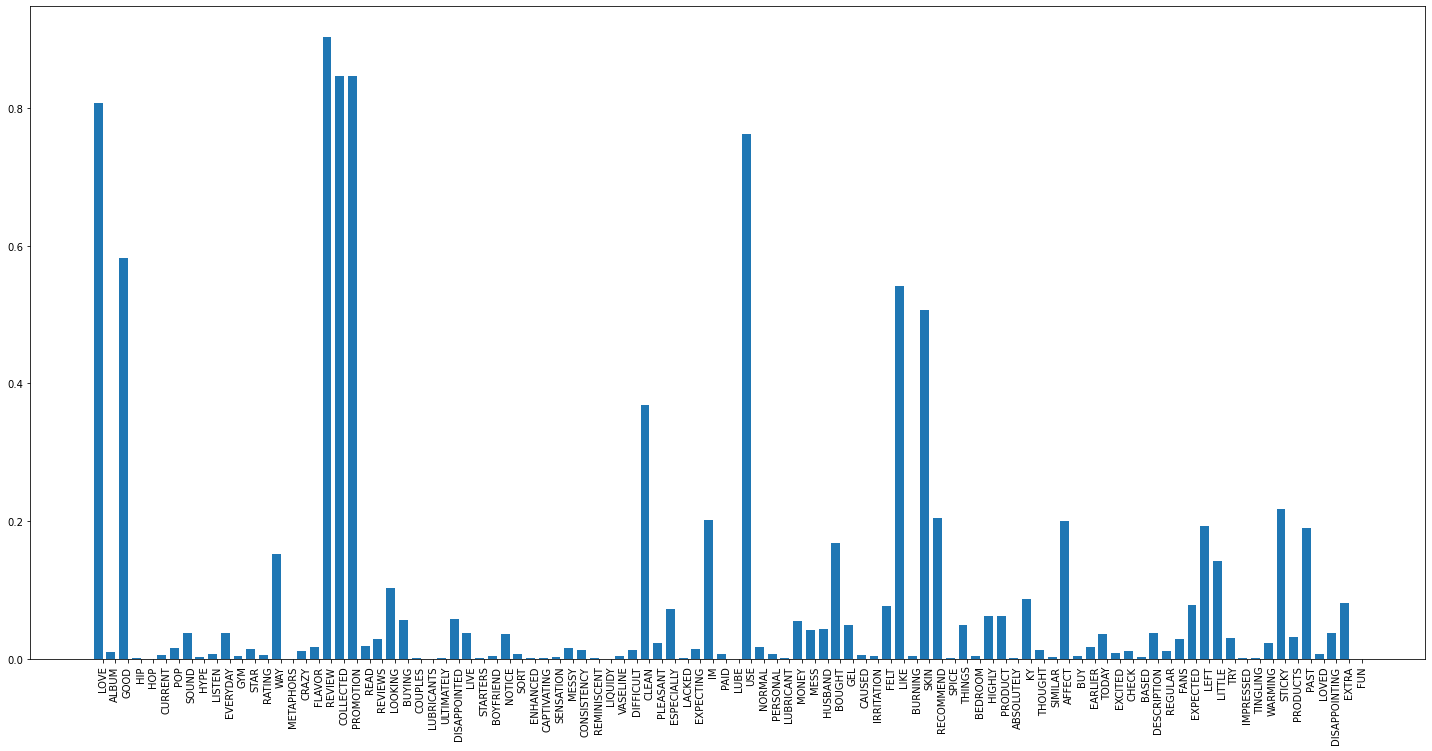

In [43]:
n = 100
words = palabras[0:n]
freq = frecuencias[0:n]

# Plot histogram using matplotlib bar().
indexes = np.arange(len(words))
width = 0.7

fig = plt.figure(figsize = (25, 12 ))
plt.bar(indexes, freq, width)
plt.xticks(indexes + width * 0.5, words)
plt.xticks(rotation = 90)
plt.show()

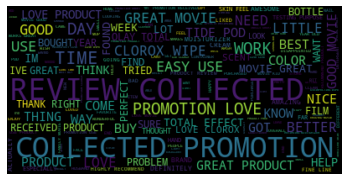

In [44]:
wordcloud = WordCloud().generate(str(text_frame))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Clasificar las oraciones

In [45]:
negative = []
neutral = []
positive = []
overall = []


for i in range(len(s)):
    sentiment_scores_modified(str(s[i]))

In [46]:
data_limpieza["Negative (%)"] = negative
data_limpieza["Neutral (%)"] = neutral
data_limpieza["Positive (%)"] = positive
data_limpieza["Overall (%)"] = overall

In [47]:
data_limpieza

,id,brand,manufacturer,name,reviews.rating,reviews.text,Negative (%),Neutral (%),Positive (%),Overall (%)
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...,10.2,59.6,30.2,69.08
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR REVIEW COLLECTED PROMOTION,0.0,58.0,42.0,44.04
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR,0.0,25.6,74.4,44.04
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...,24.6,64.6,10.8,-77.17
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,HUSBAND BOUGHT GEL GEL CAUSED IRRITATION FELT ...,19.1,52.0,28.9,17.79
...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...,14.8,76.9,8.3,-27.32
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,GREAT STUFF HELPS CONTACTS MOIST DAY,0.0,37.4,62.6,77.17
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,RIGHT PRICE,0.0,100.0,0.0,0.00
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,Bebe au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...,2.4,54.7,42.9,97.90


In [48]:
data_limpieza["Clasificacion"] = calisificar(data_limpieza)

In [49]:
data_limpieza

,id,brand,manufacturer,name,reviews.rating,reviews.text,Negative (%),Neutral (%),Positive (%),Overall (%),Clasificacion
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...,10.2,59.6,30.2,69.08,Positivo
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR REVIEW COLLECTED PROMOTION,0.0,58.0,42.0,44.04,Positivo
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR,0.0,25.6,74.4,44.04,Positivo
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...,24.6,64.6,10.8,-77.17,Negativo
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,HUSBAND BOUGHT GEL GEL CAUSED IRRITATION FELT ...,19.1,52.0,28.9,17.79,Positivo
...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...,14.8,76.9,8.3,-27.32,Negativo
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,GREAT STUFF HELPS CONTACTS MOIST DAY,0.0,37.4,62.6,77.17,Positivo
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,RIGHT PRICE,0.0,100.0,0.0,0.00,Neutral
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,Bebe au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...,2.4,54.7,42.9,97.90,Positivo


In [50]:
data_limpieza["Clasificacion"].value_counts().to_frame()

,Clasificacion
Positivo,63783
Negativo,4203
Neutral,3058


In [51]:
widget = qgrid.show_grid(data_limpieza)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…